In [1]:
import pandas as pd

df = pd.read_csv('Telecom_data_cleaned.csv')

In [2]:
df.columns.to_list()

['Unnamed: 0',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
# Excluding the columns which we don't need.
df_model = df.drop(columns=['Unnamed: 0', 'customerID'])

In [4]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df_model.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# Checking to see how many null values all the 
df_model.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Since there are only 11 null values for the 'Total Charges' column and 7043 rows in total, we can just drop these 7 rows.
df_model = df_model.dropna()

In [8]:
df_model.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# For categorical columns containing just 2 categories, we can just use label encoding.
# For categorical columns with more categories, we can use one-hot encoding (split the different options across multiple columns).
# The values in these columns will just be 1s and 0s.

# Identifying all the columns with more than 2 categories and applying one-hot encoding.
df_model = pd.get_dummies(df_model,columns=['MultipleLines',
                                            'InternetService',
                                            'OnlineSecurity',
                                            'OnlineBackup',
                                            'DeviceProtection',
                                            'TechSupport',
                                            'StreamingTV',
                                            'Contract',
                                            'PaymentMethod',
                                            'StreamingMovies'],drop_first=True)

In [10]:
# Data science models can only take in numerical data, so we convert everything to binary.
df_model = df_model.replace({True: 1, False: 0})
df_model = df_model.replace({'Yes': 1, 'No': 0})
df_model = df_model.replace({'Male': 1, 'Female': 0})

C:\Users\44771\AppData\Local\Temp\ipykernel_3496\1745214609.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model = df_model.replace({True: 1, False: 0})
C:\Users\44771\AppData\Local\Temp\ipykernel_3496\1745214609.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model = df_model.replace({'Yes': 1, 'No': 0})
C:\Users\44771\AppData\Local\Temp\ipykernel_3496\1745214609.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call 

In [11]:
cols = df_model.columns.to_list()

for col in cols:
    print(col)
    print(df_model[col].unique())
    print(df_model[col].isnull().sum())
    print(df_model[col].dtype)
    print('')

gender
[0 1]
0
int64

SeniorCitizen
[0 1]
0
int64

Partner
[1 0]
0
int64

Dependents
[0 1]
0
int64

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
0
int64

PhoneService
[0 1]
0
int64

PaperlessBilling
[1 0]
0
int64

MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
0
float64

TotalCharges
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
0
float64

Churn
[0 1]
0
int64

MultipleLines_No phone service
[1 0]
0
int64

MultipleLines_Yes
[0 1]
0
int64

InternetService_Fiber optic
[0 1]
0
int64

InternetService_No
[0 1]
0
int64

OnlineSecurity_No internet service
[0 1]
0
int64

OnlineSecurity_Yes
[0 1]
0
int64

OnlineBackup_No internet service
[0 1]
0
int64

OnlineBackup_Yes
[1 0]
0
int64

DeviceProtection_No internet service
[0 1]
0
int64

DeviceProtection_Yes
[0 1]
0
int64

TechSupport_No internet servi

### Fitting model- now that we have the encoded dataset, we can start creating models from it.

In [12]:
# Split the data so that we use a proportion of it for training the model and another proportion for testing it.

from sklearn.model_selection import train_test_split

X = df_model.drop('Churn', axis=1)  # Features- we are using all the columns to predict the churn for now.
y = df_model['Churn']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Using the model we just built, try to predict the values with the training data.
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# AUC = 'Area under curve'. This summarizes the performance of the binary classifier.
# AUC of 1 would be the perfect model while 0.5 would be equivalent to random guessing.
print("AUC: ", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

accuracy = accuracy_score(y_test, y_pred)
# The accuracy is measured as the number of correct predictions over the total number of predictions.
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

AUC:  0.8145684393620161
Accuracy: 0.79


### Precision
- 82% of the time the model predicted someone didn't churn, it was correct. 
- 63% of the time it predicted someone did churn, it was correct.
- The model is much more accurate at predicting those who didn't churn to those who did.

### Recall (What % of customers that churned (or didn't churn) did the model correctly predict?)
- The model correctly identifies 90% of customers who did not churn.
- The model correctly identifies 47% of customers who did churn.
- The model is much better at identifying non-churners than churners. It actually fails to identify more than half of the churners.

### F1 score (balance between precision and recall)
- Non-churners- 86% (strong for predicting non-churners)
- Churners- 54%

### Support
- 1033 people did not churn
- 374 people did churn 
- The dataset is imbalanced. There are way more people that did not churn than there were that did.

### Accuracy
79% of all the predictions made were correct but accuracy can be misleading due to imbalance in class distribution.

### Macro avg/weighted avg
These are the unweighted averages of precision, recall and F1. Whereas weighted avg. takes into account the imbalance between class 0 and 1. There are more non-churners than churners; more weight was given to non-churners.

### Summary
Overall, the model is good at predicting non-churners (has high precision, recall and F1) but struggles to predict churners (low recall and F1).

The dataset is very imbalanced, a lot more non-churners than churners so we should focus on improving the model to increase the recall of churners (1).

This can be done by:
- Tuning hyperparameters or adjusting the decision threshold to improve recall.
- Class balancing techniques (oversampling or undersampling).
- Trying different models like gradient boosting or XGBoost.

#### Next, we will stick with out model but tune the hyperparameters to see if this can improve the model's ability to identify churners.

In [15]:
from sklearn.model_selection import GridSearchCV

# Looping through different parameters to identify the one that offers the highest accuracy.

param_grid = { 'max_depth': [3, 5, 7, 10, 15, 20], 'n_estimators': [100, 200, 300, 400, 500] }
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [16]:
# Get the best parameters
best_params = grid.best_params_
print(f"Best parameters found: {best_params}")

# Get the best estimator (model with the best parameters)
best_model = grid.best_estimator_
print(f"Best model: {best_model}")

# Get the best score (cross-validated performance of the best model)
best_score = grid.best_score_
print(f"Best cross-validated score: {best_score:.4f}")

Best parameters found: {'max_depth': 10, 'n_estimators': 500}
Best model: RandomForestClassifier(max_depth=10, n_estimators=500)
Best cross-validated score: 0.8062


In [17]:
# Get the best model from the grid search
best_model = grid.best_estimator_

best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))

print("AUC: ", roc_auc_score(y_test, y_pred_best))

accuracy = accuracy_score(y_test, y_pred)
# The accuracy is measured as the number of correct predictions over the total number of predictions.
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

AUC:  0.6936910819947093
Accuracy: 0.79


The precision, recall and F1 have not improved by much even after fine-tuning. Time to try class balancing techniques like oversampling.

## Oversampling/undersampling

Since the dataset has way more non-churners than churners, the model is very good at identifying non-churners but still misses half of the churners when we test it. We must balance it out by adding more churner datapoints (oversampling) or taking away non-churner datapoints (undersampling).

### SMOTE (Synthetic Minority Over-sampling Technique) 
Generates synthetic samples for the minority class (churners) by creating new data points that are combinations of existing minority class samples.

### Undersampling
Reduce the size of the majority class (non-churners) to balance the dataset. Useful for very large datasets where we can afford to discard some of the majority class. 

### Combining Over- and Undersampling (SMOTEENN)
You can also combine oversampling and undersampling using techniques like SMOTEENN (a combination of SMOTE and Edited Nearest Neighbors), which creates synthetic minority class examples and then cleans the data by removing noisy samples from the majority class.

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# First, split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to oversample the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now, train the model using the resampled data
model = RandomForestClassifier()
model.fit(X_train_res, y_train_res)

# Evaluate on the test data
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


print(classification_report(y_test, y_pred))
print(f"ROC AUC score after SMOTE: {roc_auc:.4f}")
accuracy = accuracy_score(y_test, y_pred)
#The accuracy is measured as the number of correct predictions over the total number of predictions.
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1549
           1       0.55      0.58      0.56       561

    accuracy                           0.76      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.76      0.76      2110

ROC AUC score after SMOTE: 0.8049
Accuracy: 0.76


After applying SMOTE the recall for churners (% of churners correctly identified) increased from 58% to 58%.
However, the recall for non-churners decreased from 91% to 83%.

The precision of non-churners stayed the same but the precision of churners decreased from 65% to 55%.

The F1 scores and accuracy didn't change by much.

Apart from increasing the recall for churners, SMOTE has not improved the model by that much.

There is still an imbalance between churners and non-churners because we are only applying SMOTE to the training dataset and not the testing dataset.



In [21]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {roc_auc:.4f}")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1549
           1       0.57      0.52      0.54       561

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110

ROC AUC score: 0.8113
Accuracy: 0.77


C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:20:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


By only applying XGBoost, the model still hasn't improved by much. 
### Possible improvements:
- Give more weight to the minority classes (churners).
- Again, use GridSearchCV to tune hyperparameters.
- Check feature importance (maybe we only need to work with the most important columns rather than all of them).

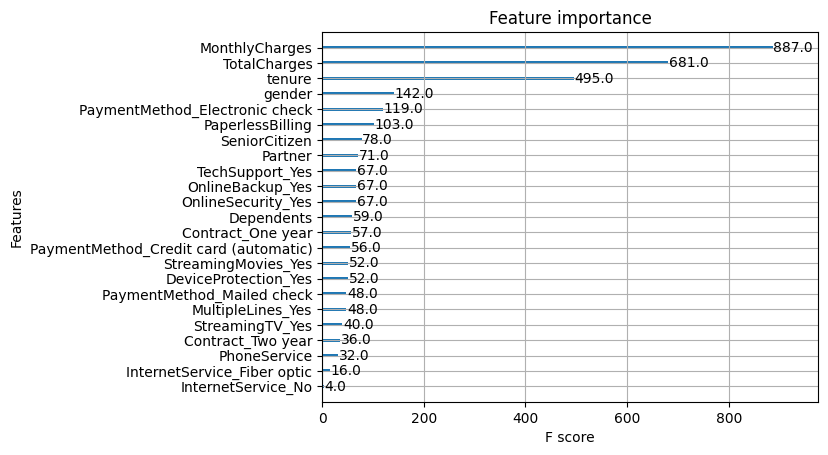

In [22]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()

Turns out that there are only 3 features (columns) which are represented to be significantly more important than all the other columns. These are- MonthlyCharges, TotalCharges and tenure (how long the customer has been with the company).
So I will attempt to re-train the model but only use the 3 features.

In [25]:
X = df_model[['MonthlyCharges','TotalCharges','tenure']]  # Features- we are using all the columns to predict the churn for now.
y = df_model['Churn']  # Target

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {roc_auc:.4f}")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110

ROC AUC score: 0.7922
Accuracy: 0.78


C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Even using important features only, the model hasn't improved by much.
Next, I will attempt to give for weight to the minority classes and tune hyperparameters.

In [31]:
X = df_model[['MonthlyCharges','TotalCharges','tenure']]  # Features- we are using all the columns to predict the churn for now.
y = df_model['Churn']  # Target

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate the scale pos weight, this is to ensure that the minority group (churners) is given more weighting.
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)

xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {roc_auc:.4f}")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

              precision    recall  f1-score   support

           0       0.86      0.74      0.80      1549
           1       0.48      0.67      0.56       561

    accuracy                           0.72      2110
   macro avg       0.67      0.70      0.68      2110
weighted avg       0.76      0.72      0.73      2110

ROC AUC score: 0.7862
Accuracy: 0.72


C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [15:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After applying the weighting, the recall of churners has significantly improved (47% to 67%), however, the precision of churners has decreased too (60% to 48%). This must mean that the model is now just assigning of the customers in the test dataset as churners- this doesn't neccessarily mean that the model is improving.

I will now try using GridSearchCV to see if this will improve the model at all.
 

In [36]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'scale_pos_weight': [scale_pos_weight]
}

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
 # Create the grid search
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Train the model using GridSearchCV
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_
print(f"Best parameters: {best_params}")

# Predict on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {roc_auc:.4f}")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 2.7629969418960245}
              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1549
           1       0.47      0.78      0.59       561

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.68      2110
weighted avg       0.78      0.71      0.72      2110

ROC AUC score: 0.8137
Accuracy: 0.71


C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:13:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


After applying:
- XGBoost
- Most important features only
- GridSearchCV to find the optimal parameters
- Scale pos weighting

The recall for churners is now 78%, however, the precision for churners is now at 47%.
The overall accuracy still hasn't changed much (71%).

The model is good at identifying churners (it has identified 78% of churners). However, there are a lot of false-positives, the model is still identifying a lot of non-churners as churners- which is why the precision of churners is so low (47%).

To increase the precision, we can further fine-tune the decision threshold to find a better balance between precision and recall.

In [39]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500],
    'scale_pos_weight': [scale_pos_weight]
}

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
 # Create the grid search
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc')

# Train the model using GridSearchCV
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_
print(f"Best parameters: {best_params}")

# Predict on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Calculate probabilities for ROC AUC score
y_pred_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]

threshold = 0.4  # Example of lowering threshold
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC score: {roc_auc:.4f}")

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarnin

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'scale_pos_weight': 2.7629969418960245}
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1549
           1       0.44      0.84      0.58       561

    accuracy                           0.67      2110
   macro avg       0.68      0.73      0.66      2110
weighted avg       0.79      0.67      0.69      2110

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1549
           1       0.47      0.78      0.59       561

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.68      2110
weighted avg       0.78      0.71      0.72      2110

ROC AUC score: 0.8137
Accuracy: 0.71


C:\Users\44771\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


The top table are the values with the balancing threshold adjusted and the bottom table is with the balancing threshold just set to 0.5. When adjusted to a lower threshold, the precision of churner is shown to increase slightly (47% to 44%) but the recall for churners increases (78% to 84%).